In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [38]:
# soybean
# import data
data = pd.read_csv('D:\论文-产量趋势利用\数据\input_soybean_exp.csv')
# D:\论文-产量趋势利用\数据\input_soybean.csv

In [17]:
model.params

array([ 1.72481068e+03, -1.75869344e+00,  4.48792795e-04])

In [39]:
# 二次拟合
# 全中西部
metric_list = []
data_train_val1 = data[data['Year'].isin([i for i in range(1980,2022)])]
X99 = np.array(data_train_val1['Year']).reshape(-1,1)
Y99 = np.array(data_train_val1['yield(t/ha)']).reshape(-1,1)
# print(X99)
x = X99
# Add quadratic term to X matrix
X99 = np.column_stack((X99, X99**2))
X99 = sm.add_constant(X99)
# print(X99)
# Fit model using OLS
model = sm.OLS(Y99, X99).fit()

# Print summary of model
print(model.summary())
metric_list.append([len(X99), model.params[2],model.params[1], model.params[0],round(model.rsquared,3),round(model.pvalues[-1],3)])
name = ['Number', 'Quadratic coefficient', 'Primary term coefficient','Constant', 'R-squared', 'P-value']
metric_df = pd.DataFrame(columns = name, data=metric_list)
# metric_df.to_csv('D:/毕业大论文/结果/趋势检测结果/soybean/' +'大豆中西部二次趋势检测结果.csv',header=True)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     8963.
Date:                Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:36:14   Log-Likelihood:                -29810.
No. Observations:               33309   AIC:                         5.963e+04
Df Residuals:                   33306   BIC:                         5.965e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1724.8107     99.687     17.302      0.0

[[1.00000000e+00 1.98000000e+03 3.92040000e+06]
 [1.00000000e+00 1.98041414e+03 3.92204017e+06]
 [1.00000000e+00 1.98082828e+03 3.92368069e+06]
 [1.00000000e+00 1.98124242e+03 3.92532154e+06]
 [1.00000000e+00 1.98165657e+03 3.92696274e+06]
 [1.00000000e+00 1.98207071e+03 3.92860429e+06]
 [1.00000000e+00 1.98248485e+03 3.93024617e+06]
 [1.00000000e+00 1.98289899e+03 3.93188840e+06]
 [1.00000000e+00 1.98331313e+03 3.93353098e+06]
 [1.00000000e+00 1.98372727e+03 3.93517389e+06]
 [1.00000000e+00 1.98414141e+03 3.93681715e+06]
 [1.00000000e+00 1.98455556e+03 3.93846075e+06]
 [1.00000000e+00 1.98496970e+03 3.94010470e+06]
 [1.00000000e+00 1.98538384e+03 3.94174899e+06]
 [1.00000000e+00 1.98579798e+03 3.94339362e+06]
 [1.00000000e+00 1.98621212e+03 3.94503859e+06]
 [1.00000000e+00 1.98662626e+03 3.94668391e+06]
 [1.00000000e+00 1.98704040e+03 3.94832957e+06]
 [1.00000000e+00 1.98745455e+03 3.94997557e+06]
 [1.00000000e+00 1.98786869e+03 3.95162192e+06]
 [1.00000000e+00 1.98828283e+03 3.953268

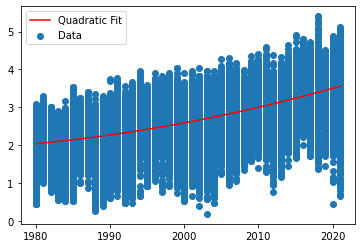

In [40]:
# 图
import matplotlib.pyplot as plt
y = Y99
# Generate points for quadratic function
x_fit = np.linspace(x.min(), x.max(), 100)
X_fit = np.column_stack(([1 for i in range(100)],x_fit, x_fit**2))
print(X_fit)
y_fit = model.predict(X_fit)
# Plot data and quadratic function
plt.scatter(x, y, label='Data')
plt.plot(x_fit, y_fit, label='Quadratic Fit',c='red')
plt.legend()
plt.show()

In [ ]:
# 分州统计
metric_list = []
for state in set(data.State):
    data1 = data[data['State'].isin([state])]
    data_train_val1 = data1[data1['Year'].isin([i for i in range(1980,2022)])]
    
    X99 = np.array(data_train_val1['Year']).reshape(-1,1)
    Y99 = np.array(data_train_val1['yield(t/ha)']).reshape(-1,1)
    # Add quadratic term to X matrix
    X99 = np.column_stack((X99, X99**2))
    X99 = sm.add_constant(X99)
    # Fit model using OLS
    model = sm.OLS(Y99, X99).fit()

    # Print summary of model
    # print(model.summary())
    print('Number:',len(X99))
    print('state:',state)
    print('R-squared:',round(model.rsquared,3))
    print('P-value:',round(model.pvalues[-1],3))
    metric_list.append([len(X99), state, model.params[2],model.params[1], model.params[0],round(model.rsquared,3),round(model.pvalues[-1],3)])
    name = ['Number', 'State','Quadratic coefficient', 'Primary term coefficient','Constant', 'R-squared', 'P-value']
    metric_df = pd.DataFrame(columns = name, data=metric_list)
    metric_df.to_csv('D:/毕业大论文/结果/趋势检测结果/soybean/' +'大豆州级二次趋势检测结果.csv',header=True)

In [ ]:
# 分县统计
metric_list = []
for sta_con in set(data.sta_con):
    data1 = data[data['sta_con'].isin([sta_con])]
    data_train_val1 = data1[data1['Year'].isin([i for i in range(1980,2022)])]
    
    X99 = np.array(data_train_val1['Year']).reshape(-1,1)
    Y99 = np.array(data_train_val1['yield(t/ha)']).reshape(-1,1)
    # Add quadratic term to X matrix
    X99 = np.column_stack((X99, X99**2))
    X99 = sm.add_constant(X99)
    # Fit model using OLS
    model = sm.OLS(Y99, X99).fit()

    # Print summary of model
    # print(model.summary())
    print('Number:',len(X99))
    print('state:',state)
    print('R-squared:',round(model.rsquared,3))
    print('P-value:',round(model.pvalues[-1],3))
    metric_list.append([len(X99), sta_con, model.params[-1],model.params[1], model.params[0],round(model.rsquared,3),round(model.pvalues[-1],3)])
    name = ['Number', 'county','Quadratic coefficient', 'Primary term coefficient','Constant', 'R-squared', 'P-value']
    metric_df = pd.DataFrame(columns = name, data=metric_list)
    metric_df.to_csv('D:/毕业大论文/结果/趋势检测结果/soybean/' +'大豆县级二次趋势检测结果.csv',header=True)


In [28]:
# maize
# import data
data = pd.read_csv('D:\论文-产量趋势利用\数据\input_maize_exp.csv')

In [29]:
# 二次拟合
# 全中西部
metric_list = []
data_train_val1 = data[data['Year'].isin([i for i in range(1980,2022)])]
X99 = np.array(data_train_val1['Year']).reshape(-1,1)
Y99 = np.array(data_train_val1['yield(t/ha)']).reshape(-1,1)
# print(X99)
x = X99
# Add quadratic term to X matrix
X99 = np.column_stack((X99, X99**2))
X99 = sm.add_constant(X99)
# print(X99)
# Fit model using OLS
model = sm.OLS(Y99, X99).fit()

# Print summary of model
print(model.summary())
metric_list.append([len(X99), model.params[2],model.params[1], model.params[0],round(model.rsquared,3),round(model.pvalues[-1],3)])
name = ['Number', 'Quadratic coefficient', 'Primary term coefficient','Constant', 'R-squared', 'P-value']
metric_df = pd.DataFrame(columns = name, data=metric_list)
metric_df.to_csv('D:/毕业大论文/结果/趋势检测结果/maize/' +'玉米中西部二次趋势检测结果.csv',header=True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                 1.256e+04
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:37:01   Log-Likelihood:                -74979.
No. Observations:               36193   AIC:                         1.500e+05
Df Residuals:                   36190   BIC:                         1.500e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5712.6599    311.710     18.327      0.0

In [30]:
# 分州统计
metric_list = []
for state in set(data.State):
    data1 = data[data['State'].isin([state])]
    data_train_val1 = data1[data1['Year'].isin([i for i in range(1980,2022)])]
    
    X99 = np.array(data_train_val1['Year']).reshape(-1,1)
    Y99 = np.array(data_train_val1['yield(t/ha)']).reshape(-1,1)
    # Add quadratic term to X matrix
    X99 = np.column_stack((X99, X99**2))
    X99 = sm.add_constant(X99)
    # Fit model using OLS
    model = sm.OLS(Y99, X99).fit()

    # Print summary of model
    # print(model.summary())
    print('Number:',len(X99))
    print('state:',state)
    print('R-squared:',round(model.rsquared,3))
    print('P-value:',round(model.pvalues[-1],3))
    metric_list.append([len(X99), state, model.params[2],model.params[1], model.params[0],round(model.rsquared,3),round(model.pvalues[-1],3)])
    name = ['Number', 'State','Quadratic coefficient', 'Primary term coefficient','Constant', 'R-squared', 'P-value']
    metric_df = pd.DataFrame(columns = name, data=metric_list)
    metric_df.to_csv('D:/毕业大论文/结果/趋势检测结果/maize/' +'玉米州级二次趋势检测结果.csv',header=True)

Number: 2393
state: michigan
R-squared: 0.605
P-value: 0.0
Number: 4052
state: iowa
R-squared: 0.568
P-value: 0.0
Number: 3292
state: missouri
R-squared: 0.405
P-value: 0.263
Number: 1607
state: north dakota
R-squared: 0.437
P-value: 0.239
Number: 3498
state: indiana
R-squared: 0.498
P-value: 0.0
Number: 4040
state: illinois
R-squared: 0.472
P-value: 0.0
Number: 2365
state: south dakota
R-squared: 0.46
P-value: 0.0
Number: 2504
state: kansas
R-squared: 0.027
P-value: 0.001
Number: 2600
state: wisconsin
R-squared: 0.541
P-value: 0.0
Number: 3524
state: nebraska
R-squared: 0.498
P-value: 0.0
Number: 3165
state: minnesota
R-squared: 0.527
P-value: 0.0
Number: 3153
state: ohio
R-squared: 0.524
P-value: 0.0


In [ ]:
# 分县统计
metric_list = []
for sta_con in set(data.sta_con):
    data1 = data[data['sta_con'].isin([sta_con])]
    data_train_val1 = data1[data1['Year'].isin([i for i in range(1980,2022)])]
    
    X99 = np.array(data_train_val1['Year']).reshape(-1,1)
    Y99 = np.array(data_train_val1['yield(t/ha)']).reshape(-1,1)
    # Add quadratic term to X matrix
    X99 = np.column_stack((X99, X99**2))
    X99 = sm.add_constant(X99)
    # Fit model using OLS
    model = sm.OLS(Y99, X99).fit()

    # Print summary of model
    print(model.summary())
    print('Number:',len(X99))
    print('county:',sta_con)
    print('R-squared:',round(model.rsquared,3))
    print('P-value:',round(model.pvalues[-1],3))
    metric_list.append([len(X99), sta_con, model.params[-1],model.params[1], model.params[0],round(model.rsquared,3),round(model.pvalues[-1],3)])
    name = ['Number', 'county','Quadratic coefficient', 'Primary term coefficient','Constant', 'R-squared', 'P-value']
    metric_df = pd.DataFrame(columns = name, data=metric_list)
    metric_df.to_csv('D:/毕业大论文/结果/趋势检测结果/maize/' +'玉米县级二次趋势检测结果.csv',header=True)